# **<< Improve machine performance : 기계 성능 개선 >>**

# **1. 모듈 호출**

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. 데이터(학습/평가) 분리
from sklearn.model_selection import train_test_split


# 2. 피처 엔지니어링
# 오버샘플링 --> 타겟 데이터 불균형 해결을 위한
from imblearn.over_sampling import SMOTE   # imblearn 의 pipline을 써야함. (사이킷런의 pipline을 쓰면 잘못된 것.)
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
# 정규화 --> 연속형 피처 불균형 해결을 위한
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# # 범주형 변수 원핫인코딩
# from sklearn.preprocessing import OneHotEncoder


# 3. (분류) 학습 모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# 4. 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV


# 5. 학습 검정 모델
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 6. (분류) 평가 모델
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# **2. 함수 만들기**

### **1) 분류 모델의 성능 검정**

In [8]:
def cross_model_validation (model, X, y, X_val, y_val) :
    """
    선정한 모델과 학습 피처, 학습 타겟값을 인자받아 
    cross_val_score를 활용한 모델 검증 함수.
    """
    
    # K-Fold Cross Validation
    cross_val_scores = cross_validate(model, X=X, y=y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

    model.fit(X, y)
    pred = model.predict(X_val)

    # 점수 
    accuracy_scores = cross_val_scores['test_accuracy']
    precision_scores = cross_val_scores['test_precision']
    recall_scores = cross_val_scores['test_recall']
    f1_scores = cross_val_scores['test_f1']
    auc_scores = cross_val_scores['test_roc_auc']


    # 각각의 지표 점수 출력
    print('<<', model, '>>')
    print('===' * 50)
    print('1. 예측 Accuracy(정확도) : {0:.4f}'.format(accuracy_score(y_val, pred)))
    print('===' * 50)
    print('2. 예측 Precision(정밀도) : {0:.4f}'.format(precision_score(y_val, pred)))
    print('===' * 50)
    print('3. 예측 Recall(재현율): {0:.4f}'.format(recall_score(y_val, pred)))
    print('===' * 50)
    print('4. 예측 F1 Score : {0:.4f}'.format(f1_score(y_val, pred)))
    print('===' * 50)
    print('5. 예측 ROC-AUC Score : {0:.4f}'.format(roc_auc_score(y_val, pred)))

### **2) 분류 모델의 평가 지표**

In [62]:
def classification_evaluation(y_test, pred=None, pred_proba=None) :
    """
    <함수 설명>
    y_test, pred, pred_proba를 입력받아 
    분류 모델의 평가 지표를 계산

    <결과>
    - confusion_matrix 
    - ('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}')
    """

    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    
    print('오차 행렬')
    sns.heatmap(confusion_matrix(y_test, pred), annot=True)
    print(confusion)
    

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### **3) 모델 학습/예측/평가**
- Feature Engineering 후 반복적으로 모델 학습/예측/평가 작업이 수행되어야 함.
- 위에서 만든 분류모델 평가지표까지 포함함.

In [10]:
def train_pred_eval(model, X_train=None, X_test=None, y_train=None, y_test=None) :
    """
    <함수 설명>
    - 모델명과 X_train, y_train를 인자받아 학습시킴
    - 인자받은 X_test로 모델을 예측하고, 예측 확률을 구함.
    - classification_evaluation 함수를 가지고 모델을 평가함.
    """

    # 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_test)
    # 예측 확률
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    # 모델 평가
    classification_evaluation(y_test, pred, pred_proba)

# **3. 데이터 로드(Data Loading)**

In [11]:
Bankruptcy_org_df = pd.read_csv('data.csv')

In [12]:
print('Bankruptcy 데이터 세트 크기 :\n', 
      '(1) row 갯수 :', Bankruptcy_org_df.shape[0], '\n',
      '(2) features 갯수 :', Bankruptcy_org_df.shape[1])


# 모든 컬럼을 보디 위한 설정
pd.set_option('display.max_columns', None)

Bankruptcy_org_df = pd.read_csv('data.csv')
Bankruptcy_org_df.tail(1)

Bankruptcy 데이터 세트 크기 :
 (1) row 갯수 : 6819 
 (2) features 갯수 : 96


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.99808,0.801987,0.8138,0.313415,0.786079,0.001432,0.0,0.427721,590000000.0,0.0,0.220766,0.220766,0.220766,0.227758,0.305793,0.000665,0.092501,0.182119,0.025316,0.848053,0.689527,0.689527,0.217605,9.350000e+09,0.000519,0.264186,0.360102,0.051348,0.040897,0.630618,0.000461,0.014149,0.985851,0.058476,0.370049,0.006368,0.092465,0.179911,0.393883,0.002999,0.000325,0.019474,19100000.0,0.0003,0.009194,0.002097,0.385767,0.000963,0.873759,0.527136,0.50501,0.238147,0.051481,0.066674,0.018517,0.239585,0.276975,0.0,1.0,0.737286,0.32669,0.0,0.938005,0.002791,0.006089,0.007864,0.008238,0.598674,0.009506,0.672096,0.005016,1.0,0.32669,0.110933,0.659917,0.483285,0.505531,0.316238,0.005579,0,0.815956,0.000707,0.62668,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


# **4. 범주형과 연속형 변수 나누기**

In [13]:
Bankruptcy_org_df.columns.tolist()

# 컬럼명 앞에 공백 지우기
Bankruptcy_org_df.columns = Bankruptcy_org_df.columns.str.strip()

In [14]:
# 카테고리형 변수
categorical_vars = ['Liability-Assets Flag', 'Net Income Flag']


# 연속형 변수
continuous_vars = [
    col 
    for col in Bankruptcy_org_df.columns 
    if col not in categorical_vars and col != 'Bankrupt?']


categorical = Bankruptcy_org_df[categorical_vars]
print('범주형 피처의 갯수 : ', categorical.shape[1], '개')

continuous = Bankruptcy_org_df[continuous_vars] 
print('연속형 피처의 갯수 : ', continuous.shape[1], '개')

범주형 피처의 갯수 :  2 개
연속형 피처의 갯수 :  93 개


# **5. 피처 엔지니어링(Feature Engineering)**

### **~~1) Oversampling - 타겟 불균형 처리~~**
- 학습 데이터에 대해서만
- 주의 : imblearn 의 pipline을 써야함. (사이킷런의 pipline을 쓰면 잘못된 것.)
- pipline 안에 oversample = SMOTE()

In [66]:
# y_target = Bankruptcy_org_df['Bankrupt?']
# X_features = Bankruptcy_org_df.drop(columns=['Bankrupt?'], axis=1)

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, stratify=y_target)

In [69]:
# pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
#                                 ['scaler', StandardScaler()],
#                                 ['classifier', LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, num_leaves=31, random_state=42)]])

In [70]:
# pipeline.get_params()

{'memory': None,
 'steps': [['smote', SMOTE(random_state=42)],
  ['scaler', StandardScaler()],
  ['classifier',
   LGBMClassifier(max_depth=6, n_estimators=300, random_state=42)]],
 'verbose': False,
 'smote': SMOTE(random_state=42),
 'scaler': StandardScaler(),
 'classifier': LGBMClassifier(max_depth=6, n_estimators=300, random_state=42),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 42,
 'smote__sampling_strategy': 'auto',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__boosting_type': 'gbdt',
 'classifier__class_weight': None,
 'classifier__colsample_bytree': 1.0,
 'classifier__importance_type': 'split',
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 6,
 'classifier__min_child_samples': 20,
 'classifier__min_child_weight': 0.001,
 'classifier__min_split_gain': 0.0,
 'classifier__n_estimators': 300,
 'classifier__n_jobs': -1,
 'classifier__num_leaves': 31,
 'classifier__objective': None,
 'classifie

In [72]:
# stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# param_grid = {'classifier__n_estimators': [300], 
#               'classifier__learning_rate' : [0.1],
#               'classifier__max_depth' : [6],
#               'classifier__num_leaves' : [31],}
# grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=stratified_kfold, n_jobs=-1)
# grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                       ['scaler', StandardScaler()],
                                       ['classifier',
                                        LGBMClassifier(max_depth=6,
                                                       n_estimators=300,
                                                       random_state=42)]]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1],
                         'classifier__max_depth': [6],
                         'classifier__n_estimators': [300],
                         'classifier__num_leaves': [31]},
             scoring='roc_auc')

In [73]:
# cv_score = grid_search.best_score_
# print(f'Cross-validation score: {cv_score}')

Cross-validation score: 0.9280855857969926


In [ ]:
# cv_accuracy_score = grid_search.best_score_
# print('1. Accuracy(정확도) : {cv_accuracy_score}')
# print('===' * 50)
# cv_precision_score = grid_search.best_score_
# print('2. Precision(정밀도) : {0:.4f}'.format(precision_score(y_val, pred)))
# print('===' * 50)
# print('3. Recall(재현율): {0:.4f}'.format(recall_score(y_val, pred)))
# print('===' * 50)
# print('4. F1 Score : {0:.4f}'.format(f1_score(y_val, pred)))
# print('===' * 50)
# print('5. ROC-AUC Score : {0:.4f}'.format(roc_auc_score(y_val, pred)))

In [74]:
# test_score = grid_search.score(X_test, y_test)
# print(f'Test score: {test_score}')

Test score: 0.921659779614325


### **2) 연속형 피처의 불균형 --> 스케일링 (StandardScaler)**

In [15]:
# 연속형 피처의 이름만 가져오기
continuous_features_name = continuous.columns

In [17]:
scaler = StandardScaler()

Bankruptcy_new_df = Bankruptcy_org_df.copy()
Bankruptcy_new_df[continuous_features_name] = scaler.fit_transform(Bankruptcy_new_df[continuous_features_name])

# Bankruptcy_org_df[continuous_features_name] = Bankruptcy_org_df[continuous_features_name].apply(lambda x: (x - x.mean()) / (x.std()))
# Bankruptcy_org_df[continuous_features_name] = Bankruptcy_org_df[continuous_features_name].fillna(0)

In [18]:
scaler = StandardScaler()

s_scaler_df = Bankruptcy_org_df.copy()
s_scaler_df[continuous_features_name] = scaler.fit_transform(s_scaler_df[continuous_features_name])

# **6. 훈련 및 시험 데이터 분리**

In [19]:
s_scaler_y_target = s_scaler_df['Bankrupt?']
s_scaler_X_features = s_scaler_df.drop(columns=['Bankrupt?'], axis=1)

In [20]:
s_scaler_X_train, s_scaler_X_test, s_scaler_y_train, s_scaler_y_test = train_test_split(s_scaler_X_features, s_scaler_y_target, test_size=0.2, random_state=42)

In [21]:
print('s스케일러 적용된 학습용 피처의 Shape :', s_scaler_X_train.shape)
print('s스케일러 적용된 시험용 피처의 Shape :', s_scaler_X_test.shape)
print('s스케일러 적용된 학습용 라벨의 Shape :', s_scaler_y_train.shape)
print('s스케일러 적용된 시험용 라벨의 Shape :', s_scaler_y_test.shape)

s스케일러 적용된 학습용 피처의 Shape : (5455, 95)
s스케일러 적용된 시험용 피처의 Shape : (1364, 95)
s스케일러 적용된 학습용 라벨의 Shape : (5455,)
s스케일러 적용된 시험용 라벨의 Shape : (1364,)


# **7. 하이퍼 파라미터 튜닝 - GridSearchCV**

In [22]:
# 분류 모델 초기화
lr_clf_gcv = LogisticRegression()
rf_clf_gcv = RandomForestClassifier() 
xgb_clf_gcv = XGBClassifier()
lgbm_clf_gcv = LGBMClassifier()

#### **(1) 로지스틱 회귀(LogisticRegression)모델의 튜닝**

In [23]:
# lr_clf_gcv = LogisticRegression()

# param_grid = {
#     # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     # 'C': [0.1, 1.0, 10.0],
#     'solver': ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear'],
#     'max_iter': [100, 200, 300]
# }

# grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=5)

# grid_search.fit(s_scaler_X_train, s_scaler_y_train)


# print("lr_clf 1차 : Best Parameters:", grid_search.best_params_)
# print("lr_clf 1차 : Best Score:", grid_search.best_score_)

lr_clf 1차 : Best Parameters: {'max_iter': 100, 'solver': 'sag'}
lr_clf 1차 : Best Score: 0.9684692942254813


In [73]:
# lr_clf_gcv = LogisticRegression()

# param_grid = {
#     # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     # 'C': [0.1, 1.0, 10.0],
#     'solver': ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear'],
#     'max_iter': [50, 75, 100]
# }

# grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=5)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)


# print("lr_clf 2차 : Best Parameters:", grid_search.best_params_)
# print("lr_clf 2차 : Best Score:", grid_search.best_score_)

lr_clf 2차 : Best Parameters: {'max_iter': 50, 'solver': 'saga'}
lr_clf 2차 : Best Score: 0.9688359303391383


In [74]:
# lr_clf_gcv = LogisticRegression()

# param_grid = {
#     # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     # 'C': [0.1, 1.0, 10.0],
#     'solver': ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear'],
#     'max_iter': [25, 50, 75, 100]
# }


# grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=5)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)


# print("lr_clf 3차 : Best Parameters:", grid_search.best_params_)
# print("lr_clf 3차 : Best Score:", grid_search.best_score_)

lr_clf 3차 : Best Parameters: {'max_iter': 50, 'solver': 'saga'}
lr_clf 3차 : Best Score: 0.9688359303391383


In [25]:
# lr_clf_gcv = LogisticRegression()

# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [100, 500, 1000]
# }


# grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)


# print("lr_clf 4차 : Best Parameters:", grid_search.best_params_)
# print("lr_clf 4차 : Best Score:", grid_search.best_score_)

lr_clf 4차 : Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
lr_clf 4차 : Best Score: 0.9697524177926313


In [26]:
# lr_clf_gcv = LogisticRegression()

# param_grid = {
#     'C': [0.05, 0.07, 0.1],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga'],
#     'class_weight': [None, 'balanced'],
#     'max_iter': [100, 150, 200]
# }


# grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)


# print("lr_clf 5차 : Best Parameters:", grid_search.best_params_)
# print("lr_clf 5차 : Best Score:", grid_search.best_score_)

lr_clf 5차 : Best Parameters: {'C': 0.07, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
lr_clf 5차 : Best Score: 0.9701191211296317


In [28]:
lr_clf_gcv = LogisticRegression()

param_grid = {
    'C': [0.06, 0.07, 0.08],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50, 70, 100]
}

grid_search = GridSearchCV(lr_clf_gcv, param_grid, cv=3)
grid_search.fit(s_scaler_X_train, s_scaler_y_train)


print("lr_clf 6차 : Best Parameters:", grid_search.best_params_)
print("lr_clf 6차 : Best Score:", grid_search.best_score_)

lr_clf 6차 : Best Parameters: {'C': 0.07, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
lr_clf 6차 : Best Score: 0.9701191211296317


#### **(2) 랜덤포레스트(RandomForestClassifier) 모델의 튜닝**

In [77]:
# rf_clf_gcv = RandomForestClassifier() 

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
#     # 'max_features': ['auto', 'sqrt'],
#     # 'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(rf_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("rf_clf 1차 : Best Parameters:", grid_search.best_params_)
# print("rf_clf 1차 : Best Score:", grid_search.best_score_)

rf_clf 1차 : Best Parameters: {'max_depth': 5, 'n_estimators': 300}
rf_clf 1차 : Best Score: 0.9710358794721327


In [78]:
# rf_clf_gcv = RandomForestClassifier() 

# param_grid = {
#     'n_estimators': [250, 300, 350],
#     'max_depth': [None, 3, 5, 7]
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
#     # 'max_features': ['auto', 'sqrt'],
#     # 'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(rf_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("rf_clf 2차 : Best Parameters:", grid_search.best_params_)
# print("rf_clf 2차 : Best Score:", grid_search.best_score_)

rf_clf 2차 : Best Parameters: {'max_depth': 5, 'n_estimators': 250}
rf_clf 2차 : Best Score: 0.9704857236685736


In [81]:
# rf_clf_gcv = RandomForestClassifier() 

# param_grid = {
#     'n_estimators': [150, 200, 250],
#     'max_depth': [None, 3, 4, 5, 7]
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
#     # 'max_features': ['auto', 'sqrt'],
#     # 'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(rf_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("rf_clf 3차 : Best Parameters:", grid_search.best_params_)
# print("rf_clf 3차 : Best Score:", grid_search.best_score_)

rf_clf 3차 : Best Parameters: {'max_depth': 5, 'n_estimators': 150}
rf_clf 3차 : Best Score: 0.9708527293997496


In [86]:
# rf_clf_gcv = RandomForestClassifier() 

# param_grid = {
#     'n_estimators': [100, 125, 150],
#     'max_depth': [4, 5, 6, 7]
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4],
#     # 'max_features': ['auto', 'sqrt'],
#     # 'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(rf_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("rf_clf 4차 : Best Parameters:", grid_search.best_params_)
# print("rf_clf 4차 : Best Score:", grid_search.best_score_)

rf_clf 4차 : Best Parameters: {'max_depth': 7, 'n_estimators': 150}
rf_clf 4차 : Best Score: 0.9710358794721327


In [88]:
rf_clf_gcv = RandomForestClassifier() 

param_grid = {
    'n_estimators': [100, 125, 150],
    'max_depth': [7, 8, 9, 10]
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt'],
    # 'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_clf_gcv, param_grid, cv=3)
grid_search.fit(s_scaler_X_train, s_scaler_y_train)

print("rf_clf 5차 : Best Parameters:", grid_search.best_params_)
print("rf_clf 5차 : Best Score:", grid_search.best_score_)

rf_clf 5차 : Best Parameters: {'max_depth': 7, 'n_estimators': 150}
rf_clf 5차 : Best Score: 0.9704859252646907


#### **(3) XGBClassifier 모델의 튜닝**

In [91]:
# xgb_clf_gcv = XGBClassifier()

# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7]
#     # 'min_child_weight': [1, 3, 5],
#     # 'gamma': [0, 0.1, 0.2]
# }

# grid_search = GridSearchCV(xgb_clf_gcv, param_grid, cv=3)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("xgb_clf 1차 : Best Parameters:", grid_search.best_params_)
# print("xgb_clf 1차 : Best Score:", grid_search.best_score_)

xgb_clf 1차 : Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
xgb_clf 1차 : Best Score: 0.9719526378146336


In [93]:
xgb_clf_gcv = XGBClassifier()

param_grid = {
    'learning_rate': [0.8, 0.01, 0.02],
    'n_estimators': [150, 200, 250],
    'max_depth': [2, 3, 4],
    # 'min_child_weight': [1, 3, 5],
    # 'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(xgb_clf_gcv, param_grid, cv=3)
grid_search.fit(s_scaler_X_train, s_scaler_y_train)

print("xgb_clf 2차 : Best Parameters:", grid_search.best_params_)
print("xgb_clf 2차 : Best Score:", grid_search.best_score_)

xgb_clf 2차 : Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
xgb_clf 2차 : Best Score: 0.9719526378146336


#### **(4) LGBMClassifier 모델의 튜닝**

In [94]:
# lgbm_clf_gcv = LGBMClassifier()

# param_grid = {
#     'learning_rate': [0.2, 0.1, 0.01],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [15, 31, 63]
#     # 'min_child_samples': [10, 20, 30]
# }

# grid_search = GridSearchCV(lgbm_clf_gcv, param_grid, cv=5)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("lgbm_clf 1차 : Best Parameters:", grid_search.best_params_)
# print("lgbm_clf 1차 : Best Score:", grid_search.best_score_)

lgbm_clf 1차 : Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 31}
lgbm_clf 1차 : Best Score: 0.9728689275893675


In [95]:
# lgbm_clf_gcv = LGBMClassifier()

# param_grid = {
#     'learning_rate': [0.2, 0.1, 0.01],
#     'n_estimators': [200, 300, 350],
#     'max_depth': [4, 5, 6],
#     'num_leaves': [25, 31, 35]
#     # 'min_child_samples': [10, 20, 30]
# }

# grid_search = GridSearchCV(lgbm_clf_gcv, param_grid, cv=5)
# grid_search.fit(s_scaler_X_train, s_scaler_y_train)

# print("lgbm_clf 2차 : Best Parameters:", grid_search.best_params_)
# print("lgbm_clf 2차 : Best Score:", grid_search.best_score_)

lgbm_clf 2차 : Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 31}
lgbm_clf 2차 : Best Score: 0.9734188817598535


In [96]:
lgbm_clf_gcv = LGBMClassifier()

param_grid = {
    'learning_rate': [0.2, 0.1, 0.05],
    'n_estimators': [250, 275, 300],
    'max_depth': [5, 6, 7],
    'num_leaves': [27, 31, 33]
    # 'min_child_samples': [10, 20, 30]
}

grid_search = GridSearchCV(lgbm_clf_gcv, param_grid, cv=5)
grid_search.fit(s_scaler_X_train, s_scaler_y_train)

print("lgbm_clf 3차 : Best Parameters:", grid_search.best_params_)
print("lgbm_clf 3차 : Best Score:", grid_search.best_score_)

lgbm_clf 3차 : Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 31}
lgbm_clf 3차 : Best Score: 0.9734188817598535


# **8. Best Parameters 모델 훈련 및 예측 검증**

#### **(1) 로지스틱 회귀(LogisticRegression) 모델의 성능검증**

In [100]:
# (1차) lr_clf 3차 : Best Parameters: {'max_iter': 50, 'solver': 'saga'}
lr_clf = LogisticRegression(max_iter=50, solver='saga', random_state=42)

print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 1차)')
cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 1차)
<< LogisticRegression(max_iter=50, random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9655
2. 예측 Precision(정밀도) : 0.6667
3. 예측 Recall(재현율): 0.1569
4. 예측 F1 Score : 0.2540
5. 예측 ROC-AUC Score : 0.5769


In [30]:
# (2차) lr_clf 6차 : Best Parameters: {'C': 0.07, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
lr_clf = LogisticRegression(C=0.07, class_weight=None, max_iter=100, penalty='l1', solver='saga', random_state=42)

print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 2차)')
cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 2차)
<< LogisticRegression(C=0.07, penalty='l1', random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9648
2. 예측 Precision(정밀도) : 0.6364
3. 예측 Recall(재현율): 0.1373
4. 예측 F1 Score : 0.2258
5. 예측 ROC-AUC Score : 0.5671


In [35]:
# (3차) lr_clf 6차 : Best Parameters: {'C': 0.07, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
lr_clf = LogisticRegression(C=0.07, max_iter=100, solver='saga', random_state=42)

print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 3차)')
cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 3차)
<< LogisticRegression(C=0.07, random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9677
2. 예측 Precision(정밀도) : 0.7692
3. 예측 Recall(재현율): 0.1961
4. 예측 F1 Score : 0.3125
5. 예측 ROC-AUC Score : 0.5969


In [38]:
# lr_clf = LogisticRegression(max_iter=100, solver='saga', random_state=42)

# print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 4차)')
# cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 4차)
<< LogisticRegression(random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9685
2. 예측 Precision(정밀도) : 0.7857
3. 예측 Recall(재현율): 0.2157
4. 예측 F1 Score : 0.3385
5. 예측 ROC-AUC Score : 0.6067


In [44]:
lr_clf = LogisticRegression(max_iter=300, solver='saga', random_state=42)

print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 5차)')
cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 5차)
<< LogisticRegression(max_iter=300, random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9692
2. 예측 Precision(정밀도) : 0.7647
3. 예측 Recall(재현율): 0.2549
4. 예측 F1 Score : 0.3824
5. 예측 ROC-AUC Score : 0.6259


In [49]:
# lr_clf = LogisticRegression(max_iter=270, solver='saga', random_state=42)

# print('1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 6차)')
# cross_model_validation(lr_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

1. 로지스틱 회귀 모델 성능검증 (베스트 파라미터 적용 6차)
<< LogisticRegression(max_iter=270, random_state=42, solver='saga') >>
1. 예측 Accuracy(정확도) : 0.9685
2. 예측 Precision(정밀도) : 0.7222
3. 예측 Recall(재현율): 0.2549
4. 예측 F1 Score : 0.3768
5. 예측 ROC-AUC Score : 0.6255


- max_iter을 올릴 수록 재현율, AUC가 증가하였고 max_iter=300 이후로 증가하지 않았음.
- C=0.07를 넣는다고 결과가 좋아지지 않았음.

#### **(2) 랜덤포레스트(RandomForestClassifier) 모델의 성능검증**

In [101]:
# (1차) rf_clf 5차 : Best Parameters: {'max_depth': 7, 'n_estimators': 150}
rf_clf = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42) 

In [104]:
print('2. 랜덤포레스트 모델 성능검증 (베스트 파라미터 적용 1차)')
cross_model_validation(rf_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

2. 랜덤포레스트 모델 성능검증 (베스트 파라미터 적용 1차)
<< RandomForestClassifier(max_depth=7, n_estimators=150, random_state=42) >>
1. 예측 Accuracy(정확도) : 0.9670
2. 예측 Precision(정밀도) : 1.0000
3. 예측 Recall(재현율): 0.1176
4. 예측 F1 Score : 0.2105
5. 예측 ROC-AUC Score : 0.5588


#### **(3) XGBClassifier 모델의 성능검증**

In [105]:
# (1차) xgb_clf 2차 : Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
xgb_clf = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)

In [109]:
print('3. XGB 모델 성능검증 (베스트 파라미터 적용 1차)')
cross_model_validation(xgb_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

3. XGB 모델 성능검증 (베스트 파라미터 적용 1차)
<< XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) >>
1. 예측 Accuracy(정확도) : 0.9670
2. 예측 Precision(정밀도) : 0.8000
3. 예측 Recall(재현율): 0.1569
4. 예측 F1 Score : 0.2623
5. 예측 ROC-AUC Score : 0.5777


#### **(4) LGBMClassifier 모델의 성능검증**

In [107]:
# lgbm_clf 3차 : Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 31}
lgbm_clf = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, num_leaves=31, random_state=42)

In [110]:
print('4. LGBM 모델 성능검증 (베스트 파라미터 적용 1차)')
cross_model_validation(lgbm_clf, s_scaler_X_train, s_scaler_y_train, s_scaler_X_test, s_scaler_y_test)

4. LGBM 모델 성능검증 (베스트 파라미터 적용 1차)
<< LGBMClassifier(max_depth=6, n_estimators=300, random_state=42) >>
1. 예측 Accuracy(정확도) : 0.9699
2. 예측 Precision(정밀도) : 0.7500
3. 예측 Recall(재현율): 0.2941
4. 예측 F1 Score : 0.4225
5. 예측 ROC-AUC Score : 0.6452


# **9. 모델 성능 평가**


<< 1차 로지스틱 회귀(Logistic Regression) 결과 >>

오차 행렬
[[1309    4]
 [  38   13]]
정확도: 0.9692, 정밀도: 0.7647, 재현율: 0.2549,    F1: 0.3824, AUC:0.9382


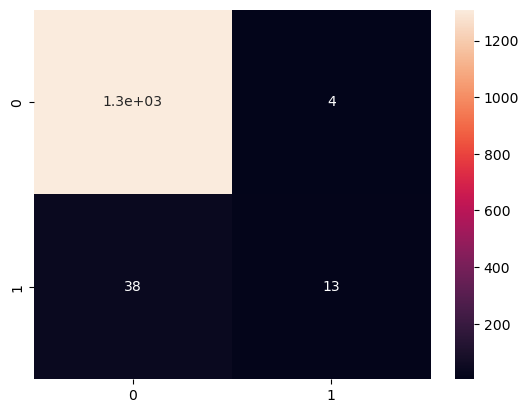

In [61]:
print('\n<< 1차 로지스틱 회귀(Logistic Regression) 결과 >>\n')
lr_clf = LogisticRegression(max_iter=300, solver='saga', random_state=42)
train_pred_eval(lr_clf, s_scaler_X_train, s_scaler_X_test, s_scaler_y_train, s_scaler_y_test)


<< 1차 랜덤포레스트(RandomForestClassifier) 결과 >>

오차 행렬
[[1313    0]
 [  45    6]]
정확도: 0.9670, 정밀도: 1.0000, 재현율: 0.1176,    F1: 0.2105, AUC:0.9278


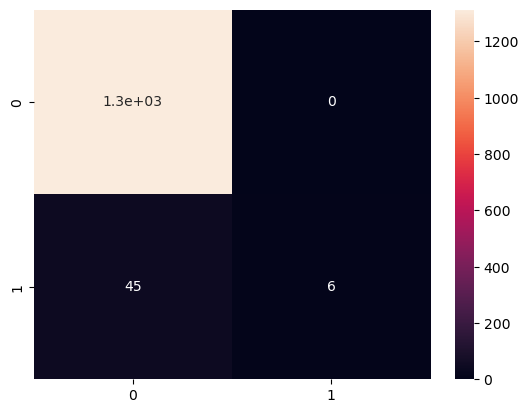

In [60]:
print('\n<< 1차 랜덤포레스트(RandomForestClassifier) 결과 >>\n')
rf_clf = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42) 
train_pred_eval(rf_clf, s_scaler_X_train, s_scaler_X_test, s_scaler_y_train, s_scaler_y_test)


<< 1차 XGBoost 결과 >>

오차 행렬
[[1306    7]
 [  40   11]]
정확도: 0.9655, 정밀도: 0.6111, 재현율: 0.2157,    F1: 0.3188, AUC:0.9238


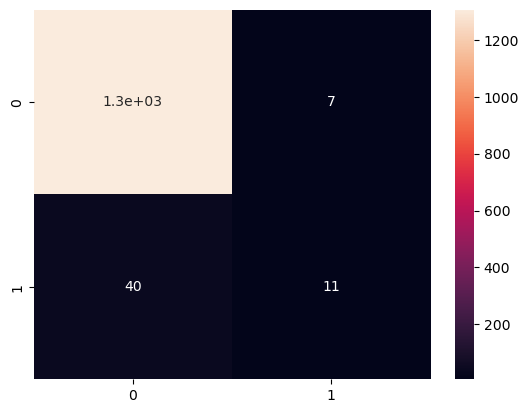

In [63]:
print('\n<< 1차 XGBoost 결과 >>\n')
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=42)
train_pred_eval(xgb_clf, s_scaler_X_train, s_scaler_X_test, s_scaler_y_train, s_scaler_y_test)


<< 1차 LightGBM 결과 >>

오차 행렬
[[1308    5]
 [  36   15]]
정확도: 0.9699, 정밀도: 0.7500, 재현율: 0.2941,    F1: 0.4225, AUC:0.9440


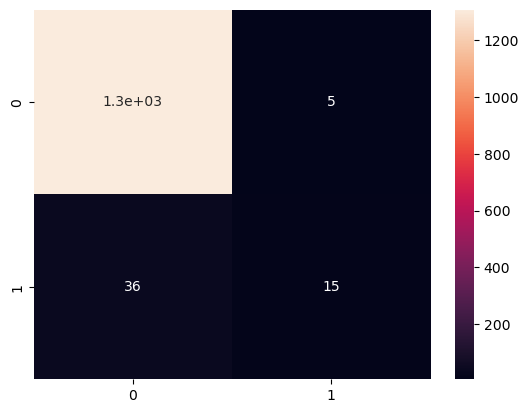

In [64]:
print('\n<< 1차 LightGBM 결과 >>\n')
lgbm_clf = LGBMClassifier(learning_rate=0.1, n_estimators=300, max_depth=6, num_leaves=31, random_state=42)
train_pred_eval(lgbm_clf, s_scaler_X_train, s_scaler_X_test, s_scaler_y_train, s_scaler_y_test)

- 모든 모델은 동일하게 재현율 < AUC가 높다.
- 양성 클래스(파산 기업)에 대한 예측 정확도가 낮고, 음성 클래스(비파산 기업)에 대한 예측 정확도가 높은 상황을 의미
- 재현율이 낮다는 것은 실제 파산 기업 중에서 많은 부분을 놓치고 있다는 의미
- AUC가 높은 경우 --> 양성 클래스에 대한 예측 확률이 음성 클래스에 대한 예측 확률보다 높은 경향
- 따라서, 재현율이 낮더라도 AUC가 높은 경우에는 모델이 양성 클래스에 대한 예측 정확도는 낮을 수 있지만, 양성과 음성을 구분하는 능력은 높은 것을 의미

- 기업 파산 예측 모델에서는 재현율이 중요한 지표 (실제 파산하는 기업을 놓치지 않고 정확하게 예측)
- 모델의 성능을 높이기 위해 재현율을 향상시킬 수 있는 방법 고려
- ex) 데이터 불균형 문제를 해결하기 위해 오버샘플링 적용